<a href="https://colab.research.google.com/github/gnitnaw/LDL/blob/main/tf_framework/c7e3_convnet_cifar_conf5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example is very similar to c7e2_convnet_cifar but the network is modified to use a more complex network. More context for this code example can be found in the section "Programming Example: Image Classification with a Convolutional Network" in Chapter 7 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import logging
import matplotlib.pyplot as plt
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 128
BATCH_SIZE = 32

# Load dataset.
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
                    test_labels) = cifar_dataset.load_data()

# Standardize dataset.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev 
test_images = (test_images - mean) / stddev 
print('mean: ', mean)
print('stddev: ', stddev)

# Change labels to one-hot.
train_labels = to_categorical(train_labels, 
                              num_classes=10)
test_labels = to_categorical(test_labels, 
                             num_classes=10)

# Conf. 1
# Model with two convolutional and one fully connected layer.
print("====================================== Conf. 1 ======================================")
model1 = Sequential()
model1.add(Conv2D(64, (5, 5), strides=(2,2),
                 activation='relu', padding='same',
                 input_shape=(32, 32, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model1.add(Conv2D(64, (3, 3), strides=(2,2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics =['accuracy'])

model1.summary()
history1 = model1.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Conf. 2
print("====================================== Conf. 2 ======================================")
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), strides=(2,2),
                 activation='relu', padding='same',
                 input_shape=(32, 32, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model2.add(Conv2D(64, (2, 2), strides=(2,2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics =['accuracy'])

model2.summary()
history2 = model2.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Conf. 3
print("====================================== Conf. 3 ======================================")
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), strides=(2,2),
                 activation='relu', padding='same',
                 input_shape=(32, 32, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (2, 2), strides=(2,2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics =['accuracy'])

model3.summary()
history3 = model3.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Conf. 4
print("====================================== Conf. 4 ======================================")
model4 = Sequential()
model4.add(Conv2D(64, (4, 4), activation='relu', padding='same',
                 input_shape=(32, 32, 3)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (2, 2), activation='relu', padding='same',
                 strides=(2,2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model4.add(Dropout(0.2))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax'))

# Compile and train the model.
model4.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics =['accuracy'])
model4.summary()
history4 = model4.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)


# Conf. 5
# Model with 4 convolutional and 2 fully-connected layers
# using dropout and max-pooling.
print("====================================== Conf. 5 ======================================")
model5 = Sequential()
model5.add(Conv2D(64, (4, 4), activation='relu', padding='same',
                 input_shape=(32, 32, 3)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (2, 2), activation='relu', padding='same',
                 strides=(2,2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model5.add(Dropout(0.2))
model5.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='softmax'))

# Compile and train the model.
model5.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics =['accuracy'])
model5.summary()
history5 = model5.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

# Conf. 6
print("====================================== Conf. 6 ======================================")
model6 = Sequential()
model6.add(Conv2D(64, (4, 4), activation='tanh', padding='same',
                 input_shape=(32, 32, 3)))
model6.add(Conv2D(64, (2, 2), activation='tanh', padding='same',
                 strides=(2,2)))
model6.add(Conv2D(32, (3, 3), activation='tanh', padding='same'))
model6.add(Conv2D(32, (3, 3), activation='tanh', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model6.add(Flatten())
model6.add(Dense(64, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(10, activation='softmax'))

# Compile and train the model.
model6.compile(loss='mean_squared_error', 
              optimizer='adam', metrics =['accuracy'])
model6.summary()
history6 = model6.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)


170508288/170498071 [==============================] - 14s 0us/step
mean:  120.70756512369792
stddev:  64.1500758911213
====================================== Conf. 1 ======================================
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 82,762
Trainable params: 82,762
Non-trainable params: 0
____________________________________________

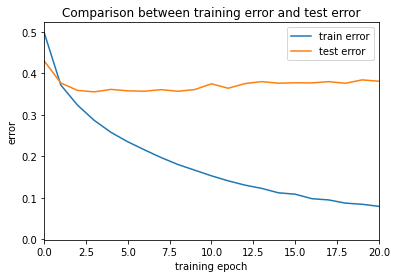

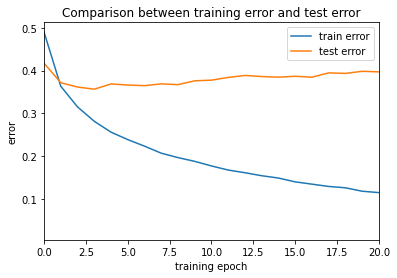

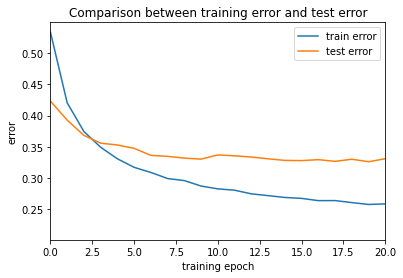

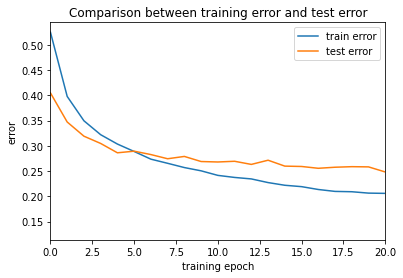

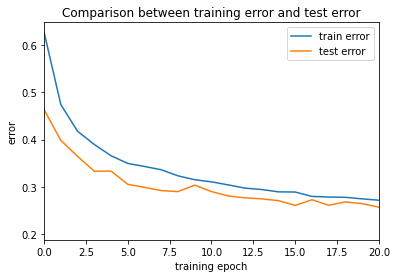

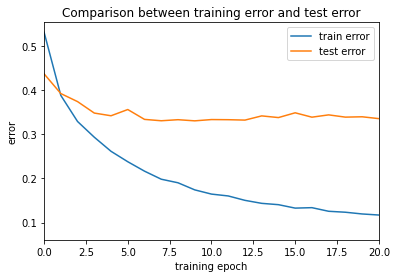

In [3]:
# summarize history for accuracy

plt.plot(1.0 - np.array(history1.history['accuracy']))
plt.plot(1.0 - np.array(history1.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history2.history['accuracy']))
plt.plot(1.0 - np.array(history2.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history3.history['accuracy']))
plt.plot(1.0 - np.array(history3.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history4.history['accuracy']))
plt.plot(1.0 - np.array(history4.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()


plt.plot(1.0 - np.array(history5.history['accuracy']))
plt.plot(1.0 - np.array(history5.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

plt.plot(1.0 - np.array(history6.history['accuracy']))
plt.plot(1.0 - np.array(history6.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()